## Outline

- Anatomy of a script
- Virtual environment, requirements.txt

__Name-space declaration (the last two lines of code in a script)__



When Python executes a script it does things in the background. It sets a variable called __name__ 

The name space is assigned the name main.

When we import a script from the command line, we are executing all of the code within it. Hence, when we are executing something from the command line, we assign this "main". If we call it from another script, it is assigned the name of the script. 


Calling script/module from command line: __name__ == "__main__"

Calling script/module from another script: __name__ == "__nameofscript__" 

No matter where we execute it from, it will run the whole script. We can change that by changing the name space.


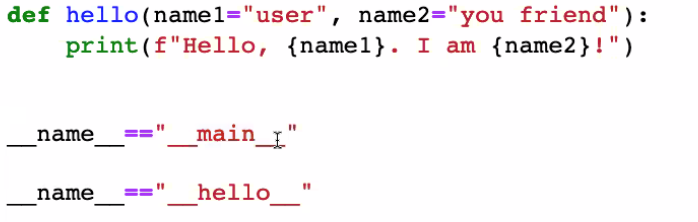

We can tell the script what to do when a script is called. We can tell it not do run the whole script, but only a particular function:
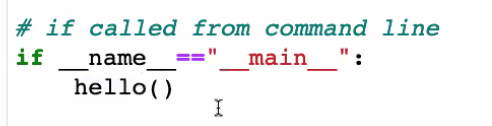

Hence, we can determine what should happen when we call the script/module. We can tell it to run one particular function.



__Why should we use the name space function?__

Because sometimes we have complex projects (modular code), which means that we have different functions in different modules/scripts. We do not want them to execute spontaneously, but instead we wnat the functions to execute them specifically. Hence, when we just import the script/module nothing should happen until we do something, and this is what we can control using the name space function. Hence, we use the name space declration to control what is being executed when a script is called. As a user, we just want to be able to use certain functions - we don't care about the script they come from, and this is why we use the name space declaration. 

If we want nothing to happen when we execute a script we can say "pass":

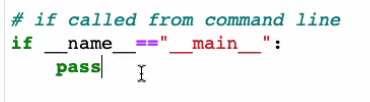

Always have the name declaration in the end of the script. 

__#!usr/bin/env python__
<br> When making this declaration we are making the script executable. We the environment to know that the script is executable. We are essentially telling the script the default interpreter. This means that we can call the script without saying "python3" before the script name in the terminal - without those lines, we would not be able to run it without typing "python3" (specifying the interpreter) before running the script. 

## Virtual Environment and the requirements.txt

What is a requirements-file?

When we call modules in a script and these modules are not part of the default installation, we need to add them to the requirements.txt file. This means that if your script depends on a particular version of a library, we should include it in the requirement.txt file. 

The requirement.txt file tells you which libraries you need to have installed in order to run your script. 

Example:
pandas==1.1.5
numpy==1.18.5

You do not have to specify the version of the library in the requirements.txt file. 

__Virtual Environment__

A virtual environemnt is a "safe space" for you to run scripts and not have any version conflicts.

__Global environment__: terminal (here we can install libraries). In order for code to be shared across operating systems, we need to be using the same version of libraries. When we are using different versions of the same packages, we can create a virtual environment, which ensures that we are using the same versions of the libraries.  

When initializing a virtual environment from the terminal we run:


$ source ./lang101/bin/activate

Now the command line changes to "lang101" which means that when we execute a script from the command line, we are executing it form the virtual environment (lang101) that we have created, which means that there will be no version conflicts, because we are no longer using our global environment. 

The packages in the virtual environment are only present there. They stay there until removed/deleted.

Always work on virtual environments not global environments.

When you want to exit a virtual environment run this:

$ deactivate()

__Creating a new virtual environment__

Run these lines in the terminal:

$ python3 -m venv test_environment

Activate it the virtual environment you just created:

$ source ./test_environment/bin/activate

How to unzip a zipped folder in a virtual environment. Run this in the terminal:

$ unzip assignment.zip assignment_dir

## Writing a Simple Concordance function (KWIC)

In [3]:
# Importing the necessary libraries
import re # regex
import string # regex

In [4]:
# Defining a text string
text = "It was the best of times, it was the worst of times"

In [5]:
# Tokenization (splitting the text into individual words)
text.split()
# The problem with this is that we still have commmas (we have both "times" and "times," even though we want "times" as a single token)

['It',
 'was',
 'the',
 'best',
 'of',
 'times,',
 'it',
 'was',
 'the',
 'worst',
 'of',
 'times']

In [7]:
# Making a better tokenization method that also removes commas and transforms everything into lower case
# Creating a quick regex tokenizer for splitting files

def tokenize(input_string):
    # Split on any non-alphanumeric character
    tokenizer = re.compile(r"\W+") # compiling the regex pattern. We define the tokenizer ahead of time. Hence, we are looking for alpha-numeric characters and compiling them 
    # Tokenize
    token_list = tokenizer.split(input_string) # return a token list by splitting the input string using the compiling pattern
    # Return list of tokens
    return token_list
    

When writing regular expressions in Python we write "r" before the string

\W means alphanumeric character

In [9]:
tokenized = tokenize(text)

In [10]:
print(tokenized)

['It', 'was', 'the', 'best', 'of', 'times', 'it', 'was', 'the', 'worst', 'of', 'times']


In [11]:
# Defining a new text string
text2 = "The world’s biggest oil companies are no stranger to UK waters, but by the end of the decade they will be running more offshore wind turbines than oil rigs."

In [12]:
tokenize(text2)

['The',
 'world',
 's',
 'biggest',
 'oil',
 'companies',
 'are',
 'no',
 'stranger',
 'to',
 'UK',
 'waters',
 'but',
 'by',
 'the',
 'end',
 'of',
 'the',
 'decade',
 'they',
 'will',
 'be',
 'running',
 'more',
 'offshore',
 'wind',
 'turbines',
 'than',
 'oil',
 'rigs',
 '']

There is a problem. It also splits at apostrophes. 

## Code along task: Creating a KWIC function

Using regex to create a concordance tool

In [13]:
# We can use regex to create a list that we can reiterate over.
# We go throuygh text2 and find every occurance of "waters"
for match in re.finditer("waters", text2):
    print(match) # We find that "waters" occurs between character 56 and character 62 in text2. 
    print(match.start()) # finding where the occurrence starts
    print(match.end()) # finding where the occurrence ends


<_sre.SRE_Match object; span=(56, 62), match='waters'>


In [16]:
# Defining a function that finds a keyword in a text
# The window size is the number of characters before and after the keyword (target word)
def kwic(text, keyword, window_size = 50):
    # For all regex matches
    for match in re.finditer(keyword, text): # find the keyword in the text
        word_start = match.start() # finding the first character index of the keyword 
        word_end = match.end() # finding the last character index of the match
        
        # Left window: everything that comes before the keyword
        left_window_start = max(0, word_start-window_size) # we define that the left context window begins 50 characters (window size) before the word begins. We do not want a negative value so we use the max() function, to say that two values are possible: 0 or the word_start-window_size
        left_window = text[left_window_start:word_start]
        
        # Right window: everything after the keyword
        right_window_end = word_end + window_size
        right_window = text[word_end : right_window_end]
        
        # Print match
        line = f"{left_window} {keyword} {right_window}"
        
        print(line)

# With this function we know where the keyword starts and end

In [17]:
# Using the function
kwic(text2, "the")
# It prints the left_window then the keyword which is "the" and then the right_window

il companies are no stranger to UK waters, but by  the  end of the decade they will be running more offsh
s are no stranger to UK waters, but by the end of  the  decade they will be running more offshore wind tu
ranger to UK waters, but by the end of the decade  the y will be running more offshore wind turbines than


## Collocation

Calculating the collocation is calculating the difference between two numbers - the observed frequencies and the expected frequencies (what we expect given certain distributions)

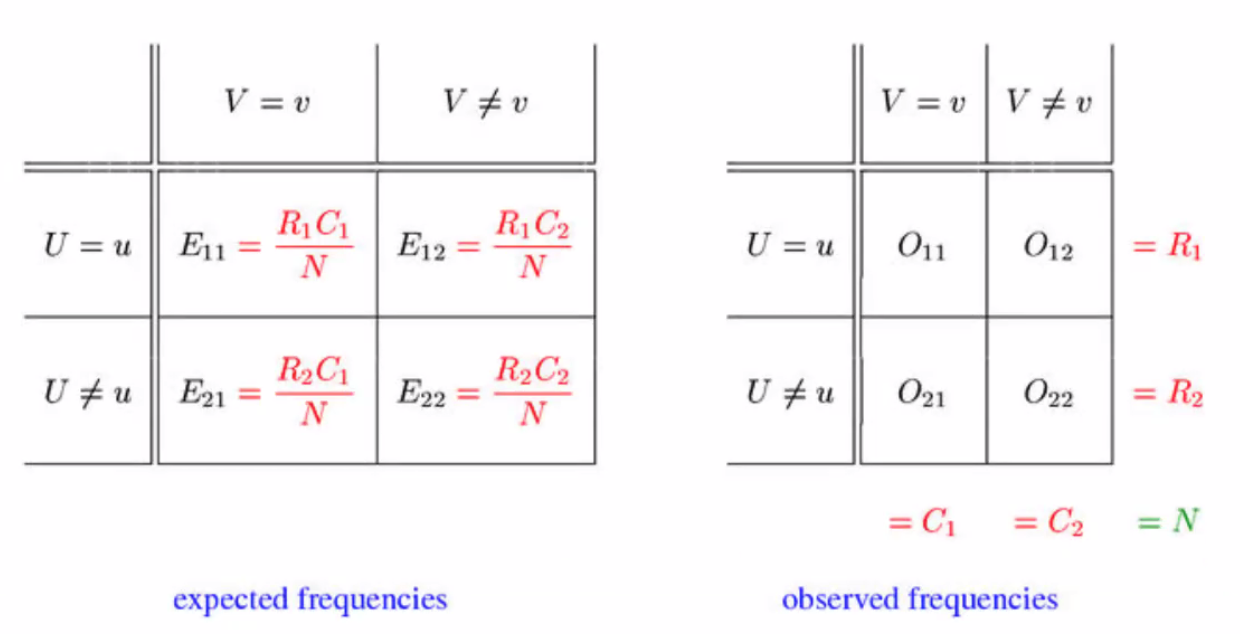

See link: http://collocations.de/AM/index.html

Hence, we are interested in U (our keyword) and V (collocate)
<br>
u = our keyword <br>
v = collocate

Hence, we are essentially looking for a tuple.
1. How often the keyword occurs in context with the collocate
2. How often our keyword occurs outside the context of the collocate

O11 = our keyword and our collocate. <br> 
O12 = our keyword but not our collocate

Calculating the strenght of association (MI)
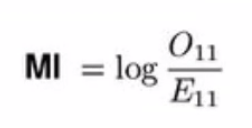

u = how often the keyword occurs <br>
v = how often collocate appears along with u (the keyword) <br>
O11 = v & u <br>
O21 = v & !u <br>
N = total number of words

Example: we want to be able to search for a keyword in a certain corpus and all of the words that occur in the same context as that keyword.

In [ ]:
# Go through texts in a corpus and calculate different measures and return the MI score for each collocate
for text in corpus:
    # Calculate each of these
    u = 
    v = 
    
    R1 =
    C1 = 
    
    # Length of text
    N = len()
    
    # Expected frequency
    E11 = (R1*C1/N)
    
    # Return MI
    MI = log(O11/E11)
    
# Output: CSV-file with collocates and their MI (strength of association)